In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow import keras
from tensorflow.keras import layers


# Load the MNIST dataset from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

In [7]:
# Extract features and labels
X_train = train_data.iloc[:, 1:].values / 255.0  # Normalize pixel values to be between 0 and 1
y_train = train_data.iloc[:, 0].values

X_test = test_data.iloc[:, 1:].values / 255.0
y_test = test_data.iloc[:, 0].values


In [8]:
# Reshape features to match the expected input shape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [9]:
# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [10]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [11]:
# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))


Epoch 1/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1646 - accuracy: 0.9485 - val_loss: 0.0526 - val_accuracy: 0.9834
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0507 - accuracy: 0.9835 - val_loss: 0.0516 - val_accuracy: 0.9843
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0347 - accuracy: 0.9890 - val_loss: 0.0443 - val_accuracy: 0.9877
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0281 - accuracy: 0.9910 - val_loss: 0.0321 - val_accuracy: 0.9902
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0214 - accuracy: 0.9934 - val_loss: 0.0352 - val_accuracy: 0.9893
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0164 - accuracy: 0.9951 - val_loss: 0.0360 - val_accuracy: 0.9901
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0142 - accuracy: 0.9954 - val_loss: 0.0471 - val_accuracy:

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 2ms/step - loss: 0.0315 - accuracy: 0.9922
Test accuracy: 0.9922000169754028


In [15]:
# Make predictions on the test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)


313/313 [==============================] - 1s 2ms/step


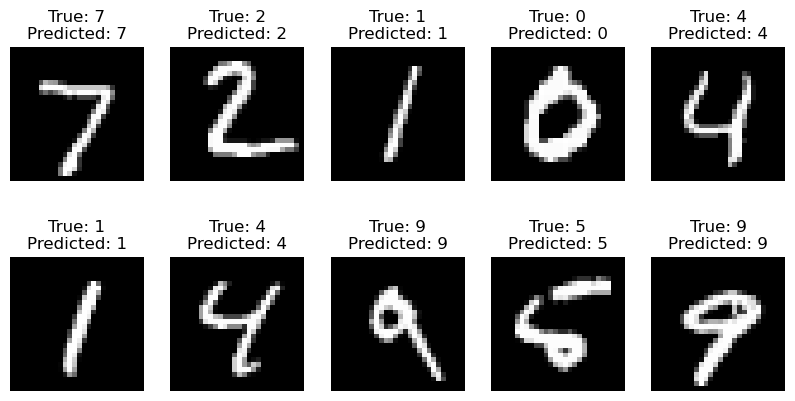

In [16]:
# Display some results
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
    plt.axis('off')
plt.show()

In [17]:
# Print classification report
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      1.00       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

